# Sprint 8

En este proyecto se trabajó como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. La tarea fué encontrar patrones en la información disponible. Se buscó comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Se estudió una base de datos, se analizaron los datos de los competidores y se probó una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

In [2]:
# Importas librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Importar datos desde archivos CSV

In [ ]:
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv', sep=',')
df_dropoffs = pd.read_csv('/datasets/project_sql_result_04.csv', sep=',')
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv', sep=',')

In [4]:
# Mostrar información básica del primer DataFrame
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Mostrar las primeras filas del DataFrame
df_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Revisando los datos parece ser que sus tipos de datos son correctos.

In [6]:
# Mostrar información básica del segundo DataFrame
df_dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
# Mostrar las primeras filas del DataFrame
df_dropoffs.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Revisando los datos parece ser que sus tipos de datos son correctos.

In [8]:
# Mostrar información básica del tercer DataFrame
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [9]:
# Mostrar las primeras filas del DataFrame
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Podemos observar que el tipo de datos de la columna start_ts no tiene el tipo correcto, lo cambiaremos a tipo datetime. También se puede observar que en la columna duration_seconds solo tenemos números enteros por lo que cambiaremos del tipo float al tipo int.

In [10]:
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts']) 
df_weather["duration_seconds"] = df_weather["duration_seconds"].astype(int)
df_weather.info() #Confirmamos los cambios realizados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


## Identificar los 10 principales barrios en términos de finalización.

In [11]:
top10_dropoffs = df_dropoffs.sort_values(by="average_trips", ascending=False).head(10)
top10_dropoffs

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Hacer gráficos: empresas de taxis y número de viajes.

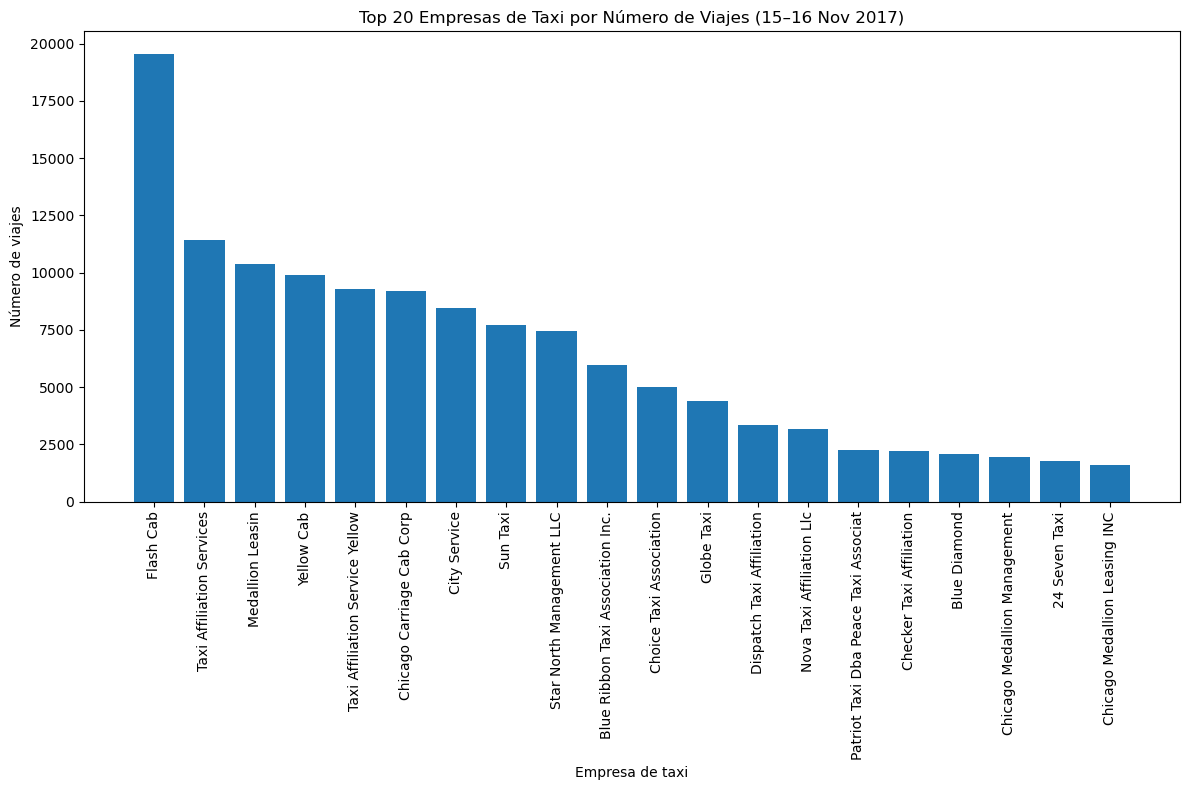

In [18]:
top20_companies = df_companies.sort_values(by="trips_amount", ascending=False).head(20)

plt.figure(figsize=(12,8))
plt.bar(top20_companies["company_name"], top20_companies["trips_amount"])
plt.xticks(rotation=90)
plt.title("Top 20 Empresas de Taxi por Número de Viajes (15–16 Nov 2017)")
plt.xlabel("Empresa de taxi")
plt.ylabel("Número de viajes")
plt.tight_layout()
plt.show()

## Conclusiones de la gráfica:
El gráfico muestra que unas pocas empresas concentran la mayor actividad de viajes. Flash Cab lidera con un número significativamente mayor de viajes, seguida por Taxi Affiliation Services y Medallion Leasing. Esto indica que el mercado está dominado por pocas compañías grandes, mientras que muchas otras tienen volúmenes muy bajos, posiblemente operadores pequeños o independientes.

## Hacer gráficos: Los 10 barrios principales por número de finalizaciones.

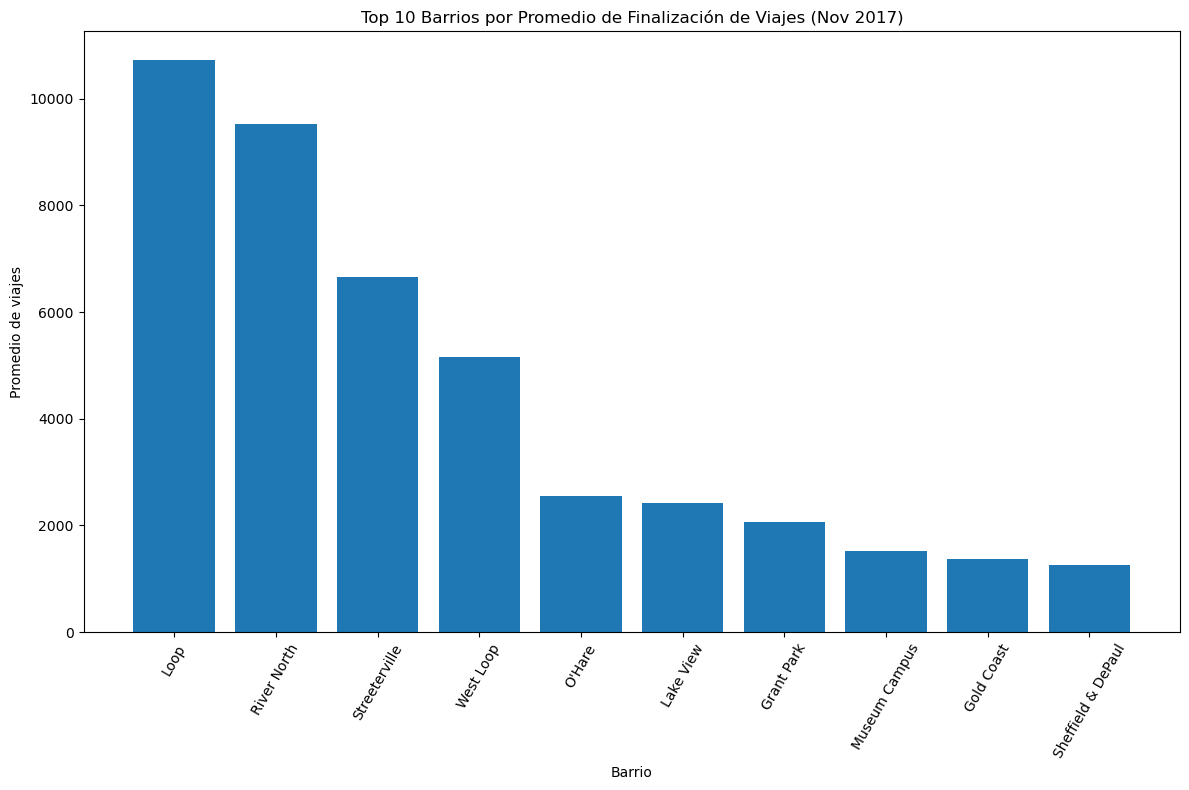

In [13]:
plt.figure(figsize=(12,8))
plt.bar(top10_dropoffs["dropoff_location_name"], top10_dropoffs["average_trips"])
plt.xticks(rotation=60)
plt.title("Top 10 Barrios por Promedio de Finalización de Viajes (Nov 2017)")
plt.xlabel("Barrio")
plt.ylabel("Promedio de viajes")
plt.tight_layout()
plt.show()

## Conclusiónes de la gráfica:
Los barrios con mayor promedio de finalizaciones son Loop, River North, Streeterville y West Loop. Se trata de zonas con alta concentración de oficinas, turismo, comercios y servicios, lo cual explica el volumen elevado de viajes. La gran diferencia entre los primeros cuatro barrios y el resto muestra que la demanda de taxis se concentra en el centro de Chicago.

## Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [14]:
# Filtrar datos para sábados
df_weather['weekday'] = df_weather['start_ts'].dt.day_name()
saturdays = df_weather[df_weather['weekday'] == 'Saturday']

# Separar datos en días lluviosos y no lluviosos
rainy = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']
not_rainy = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']

# Realizar la prueba t de Student
result = ttest_ind(rainy, not_rainy, equal_var=False)

print("Promedio sábados lluviosos:", rainy.mean())
print("Promedio sábados sin lluvia:", not_rainy.mean())
print("T-statistic:", result.statistic)
print("p-value:", result.pvalue)

Promedio sábados lluviosos: 2427.2055555555557
Promedio sábados sin lluvia: 1999.6756756756756
T-statistic: 7.186034288068629
p-value: 6.738994326108734e-12


## Conclusiones:

¿Cómo se planteó la hipótesis nula y alternativa?

Para probar la hipótesis “La duración promedio de los viajes desde el Loop hasta O'Hare cambia los sábados lluviosos”, se necesita comparar dos medias:

1.- Viajes en sábados lluviosos → weather_conditions == "Bad"

2.- Viajes en sábados sin lluvia → weather_conditions == "Good"
     
     Hipótesis nula (H₀)
No hay diferencia en la duración promedio de los viajes entre sábados lluviosos y sábados sin lluvia.
Matemáticamente:
μ_lluvia = μ_no_lluvia

Esto significa que el clima no afecta la duración.

     Hipótesis alternativa (H₁)

La duración promedio de los viajes sí cambia en los sábados lluviosos.
Matemáticamente:
μ_lluvia ≠ μ_no_lluvia

Es una hipótesis bilateral, porque la duración podría aumentar o disminuir.

¿Qué criterio se usó para probar las hipótesis y porqué?

Prueba utilizada: t-test de Welch (dos muestras independientes)

Se usó scipy.stats.ttest_ind(..., equal_var=False), que corresponde al t-test de Welch, el cual se usa cuando:

1.- Se comparan dos medias

2.- Las muestras tienen tamaños diferentes

3.- Las varianzas no necesariamente son iguales (lo más realista en datos reales)

Nivel de significancia elegido (α)

Usualmente se usa α = 0.05, a menos que la actividad especifique otro.

Criterio de decisión

Si:

p-value < α → se rechaza la hipótesis nula H₀

p-value ≥ α → no se puede rechazar H₀

Aplicación del resultado

El p-value es:

0.0000000000067 (muy pequeño)

Esto es muchísimo menor que 0.05 →
Se rechaza H₀.

Conclusión

Sí existe una diferencia estadísticamente significativa en la duración promedio de los viajes en sábados lluviosos.

Además, como el promedio con lluvia es mayor… los viajes duran más cuando llueve los sábados.
